# **KLASIFIKASI KANKER PAYUDARA**

### **IMPORT LIBRARY YANG DIBUTUHKAN**

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
import pickle

### **LOAD DATASET**

In [56]:
data = pd.read_csv("breast_cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [57]:
# Memeriksa nilai unik di kolom diagnosis
print("Nilai unik di kolom diagnosis:", data['diagnosis'].unique())


Nilai unik di kolom diagnosis: ['M' 'B']


## **EXPLORATORY DATA ANALYSIS (EDA)**

### **Overview Data**

In [58]:
print("1. Overview Data:")
print("Dimensi dataset:", data.shape)
print("\nInformasi Dataset:")
print(data.info())

1. Overview Data:
Dimensi dataset: (569, 33)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se     

### **Pengecekan Missing Value**

In [59]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wors

### **Statistik Deksriptif**

In [60]:
print("\nStatistik Deskriptif:")
print(data.describe())


Statistik Deskriptif:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064

### **Cek outlier dengan IQR method**

In [61]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    return len(outliers)
    print("\nJumlah Outlier per Kolom:")

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    if column != 'id' :  # Skip kolom id
        outliers_count = detect_outliers(data, column)
        if outliers_count > 0:
            print(f"{column}: {outliers_count} outliers")

radius_mean: 14 outliers
texture_mean: 7 outliers
perimeter_mean: 13 outliers
area_mean: 25 outliers
smoothness_mean: 6 outliers
compactness_mean: 16 outliers
concavity_mean: 18 outliers
concave points_mean: 10 outliers
symmetry_mean: 15 outliers
fractal_dimension_mean: 15 outliers
radius_se: 38 outliers
texture_se: 20 outliers
perimeter_se: 38 outliers
area_se: 65 outliers
smoothness_se: 30 outliers
compactness_se: 28 outliers
concavity_se: 22 outliers
concave points_se: 19 outliers
symmetry_se: 27 outliers
fractal_dimension_se: 28 outliers
radius_worst: 17 outliers
texture_worst: 5 outliers
perimeter_worst: 15 outliers
area_worst: 35 outliers
smoothness_worst: 7 outliers
compactness_worst: 16 outliers
concavity_worst: 12 outliers
symmetry_worst: 23 outliers
fractal_dimension_worst: 24 outliers


### **Distribusi fitur dengan target**

In [62]:
def plot_distribution_by_target(data, feature):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='diagnosis', y=feature, data=data)
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.show()

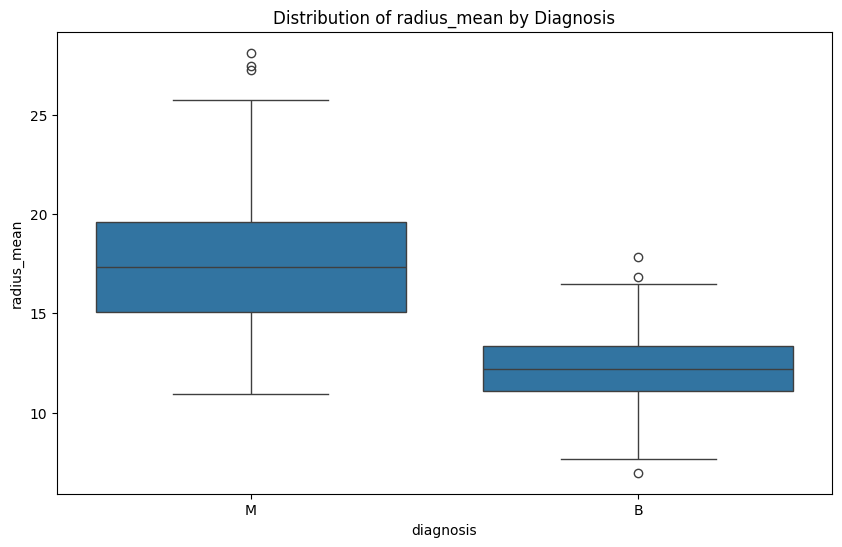

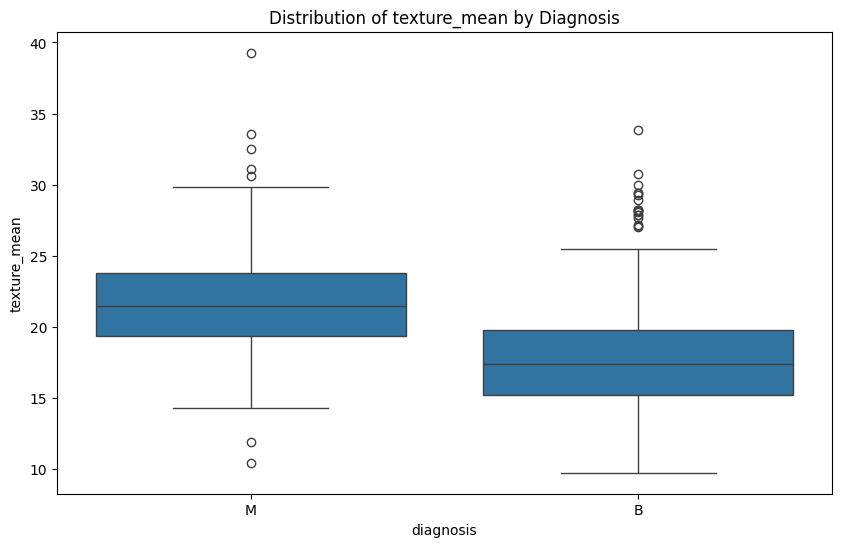

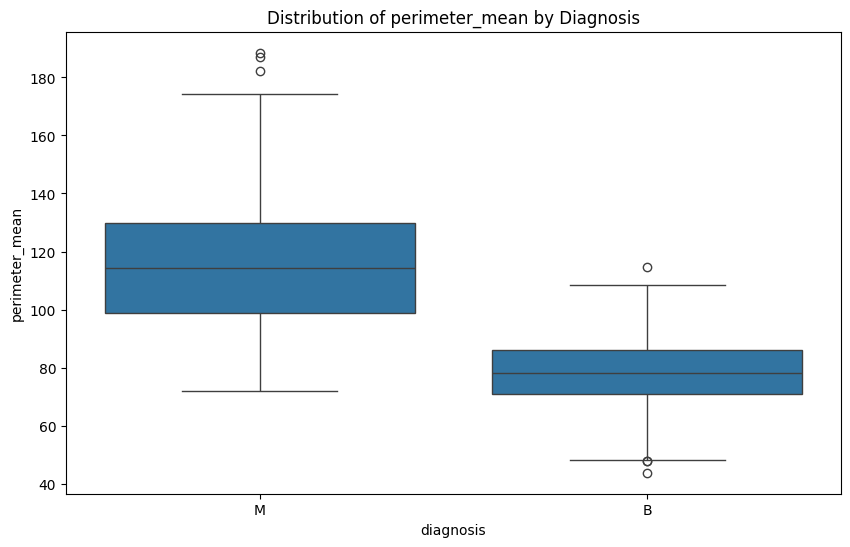

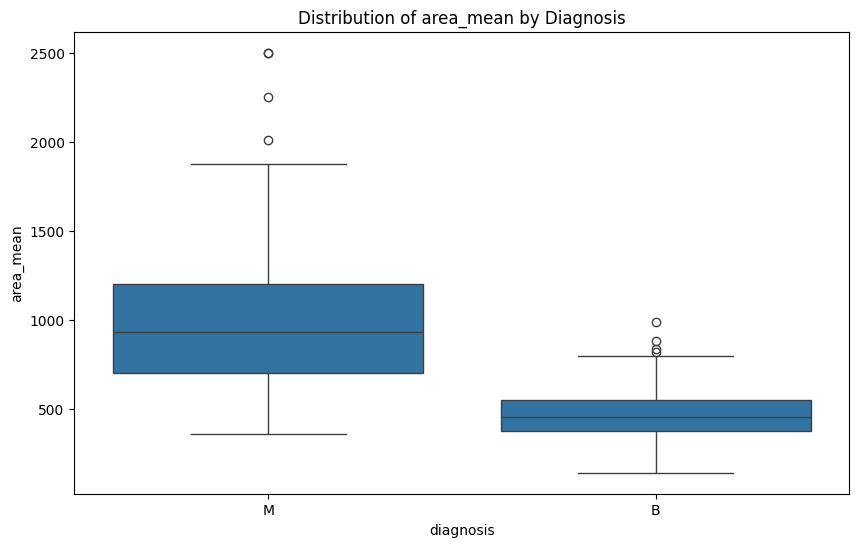

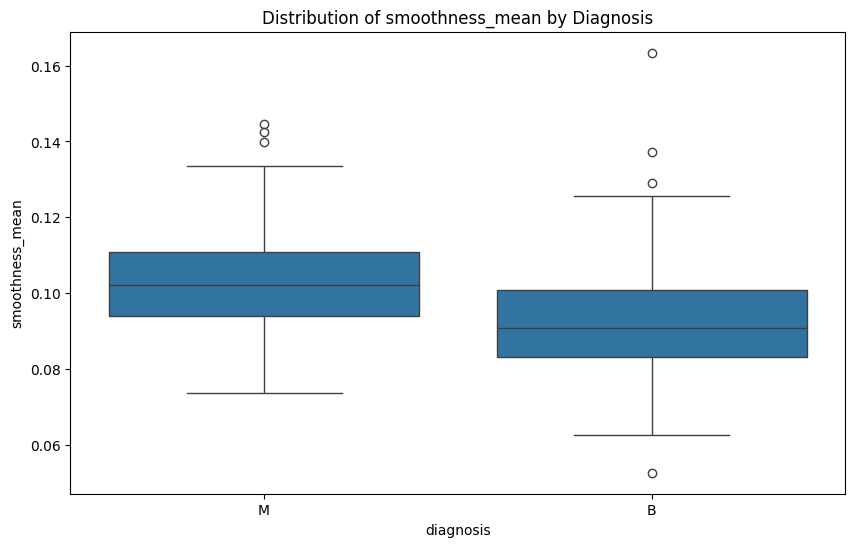

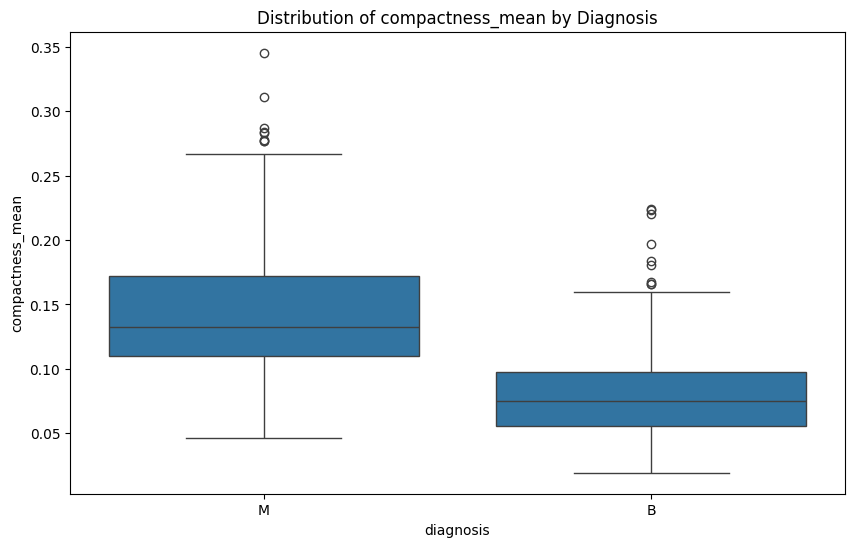

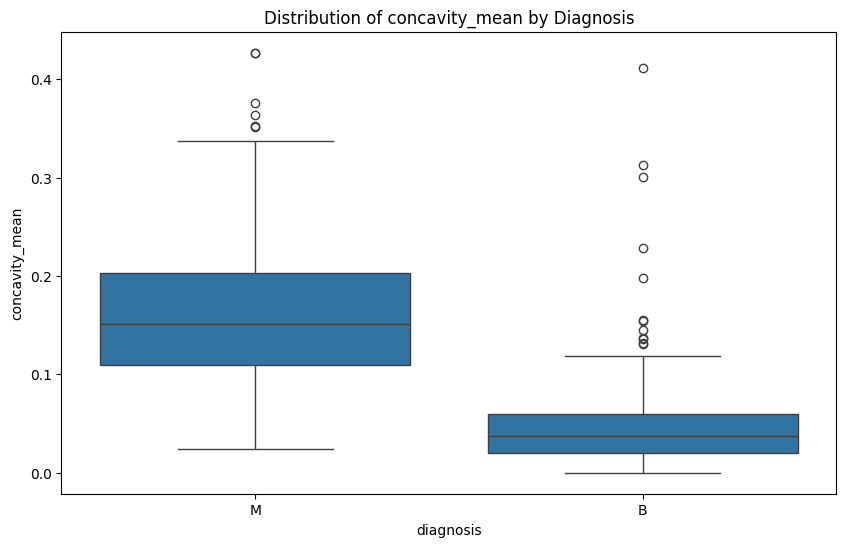

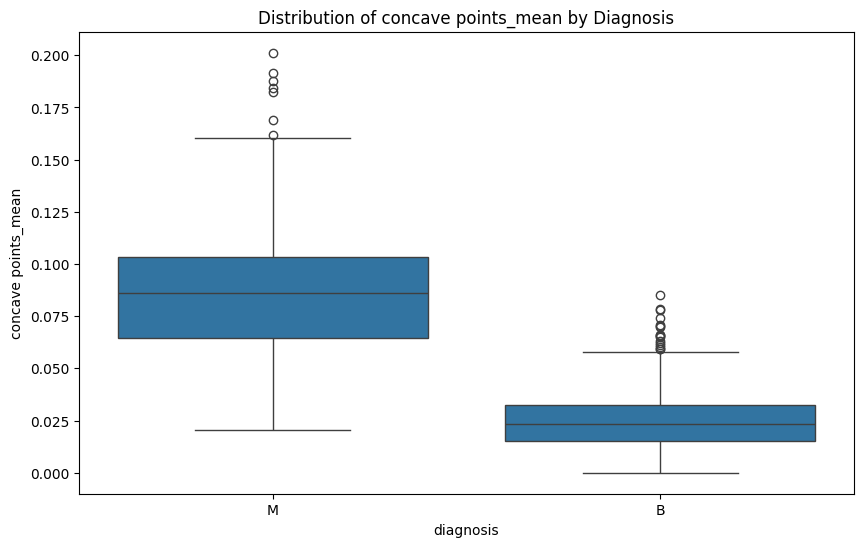

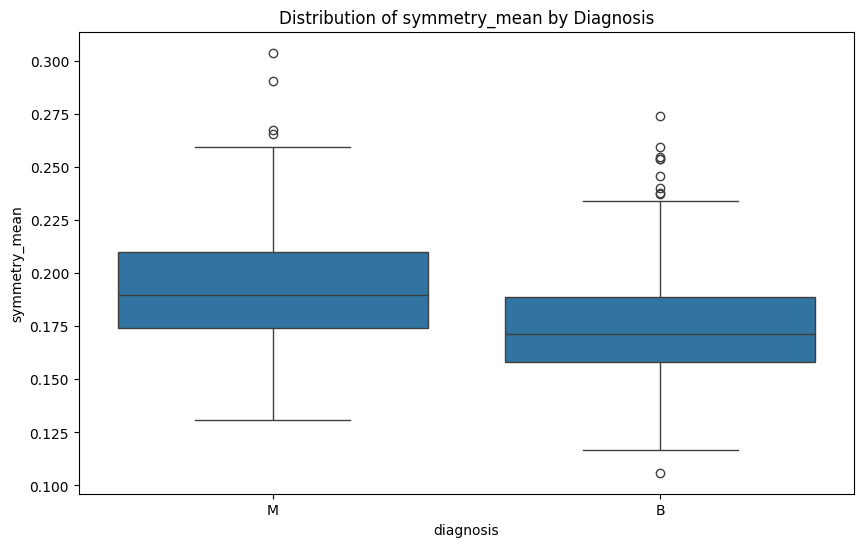

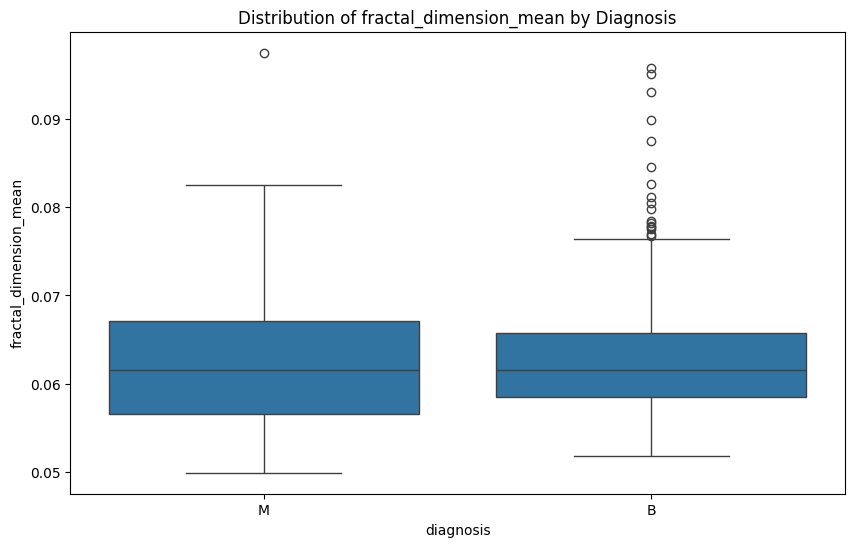

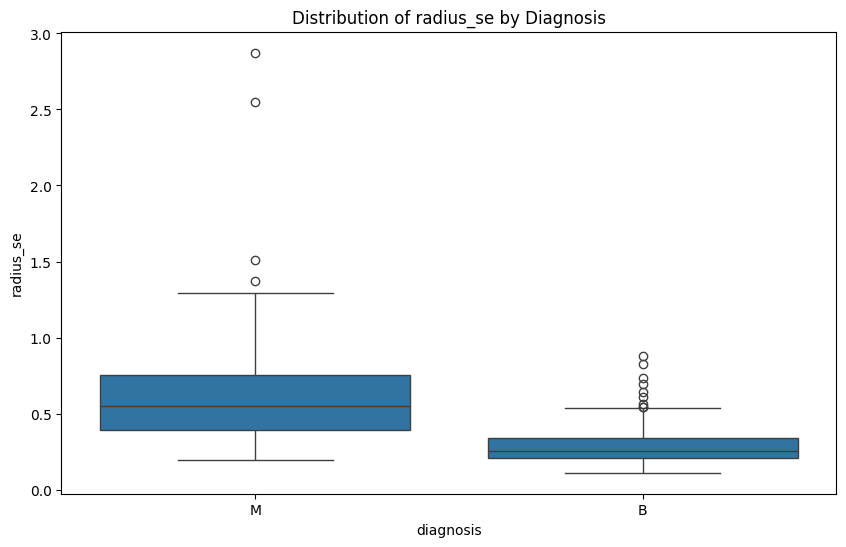

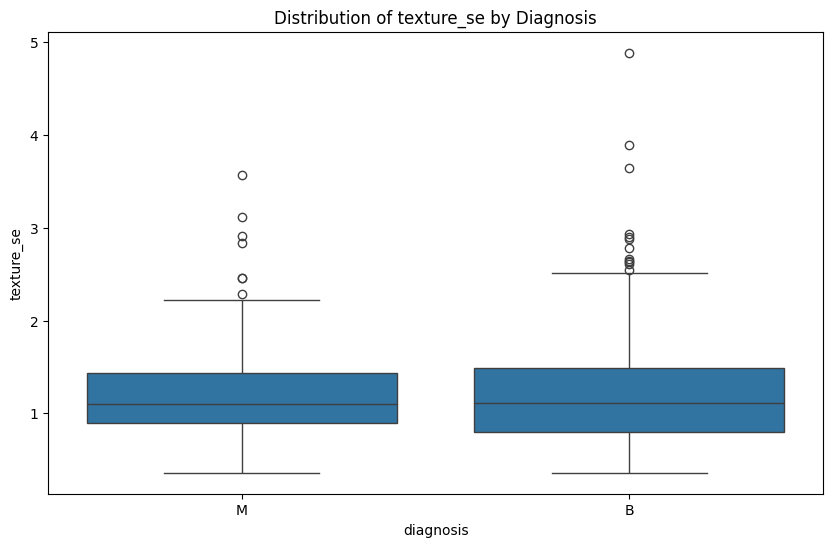

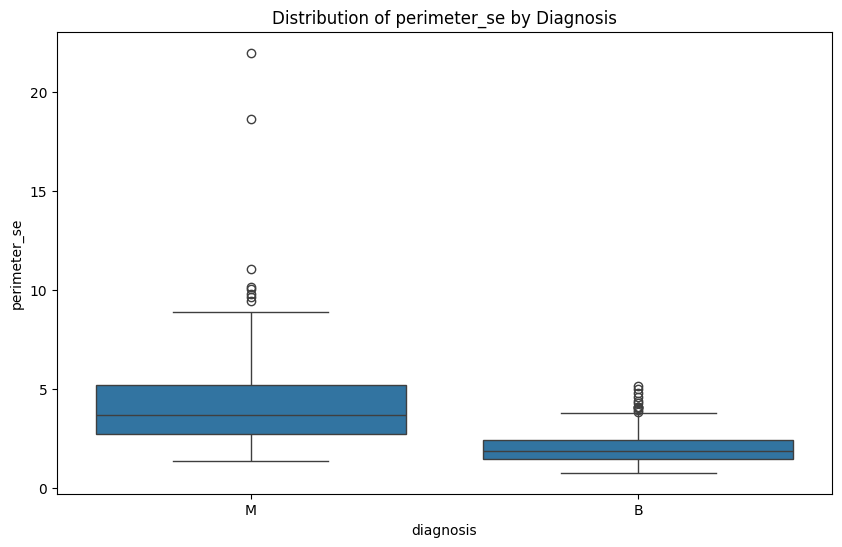

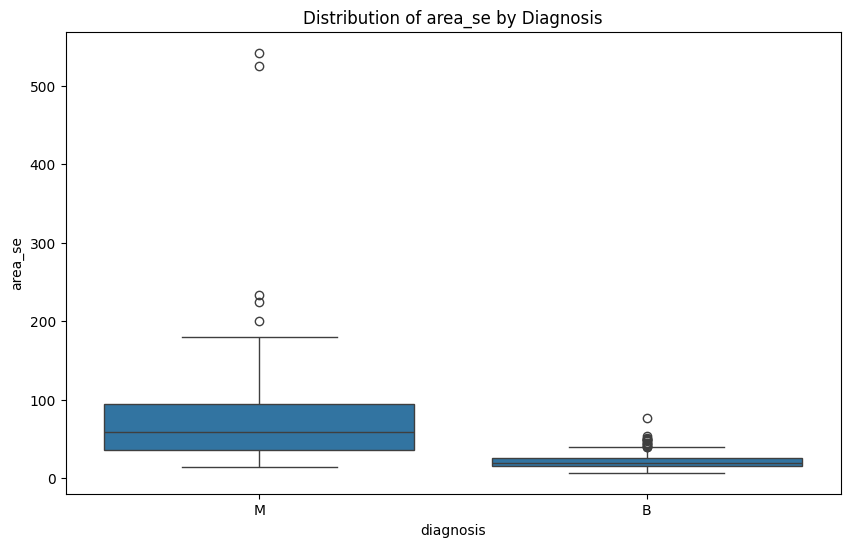

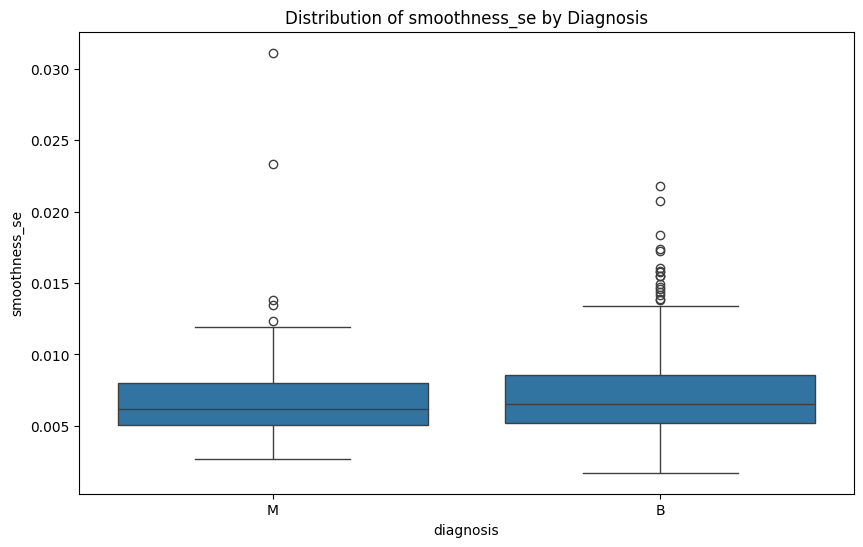

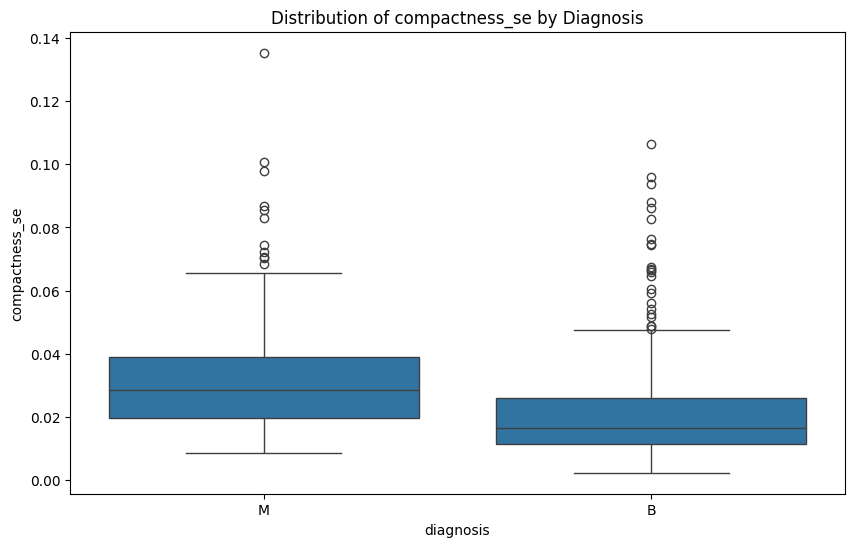

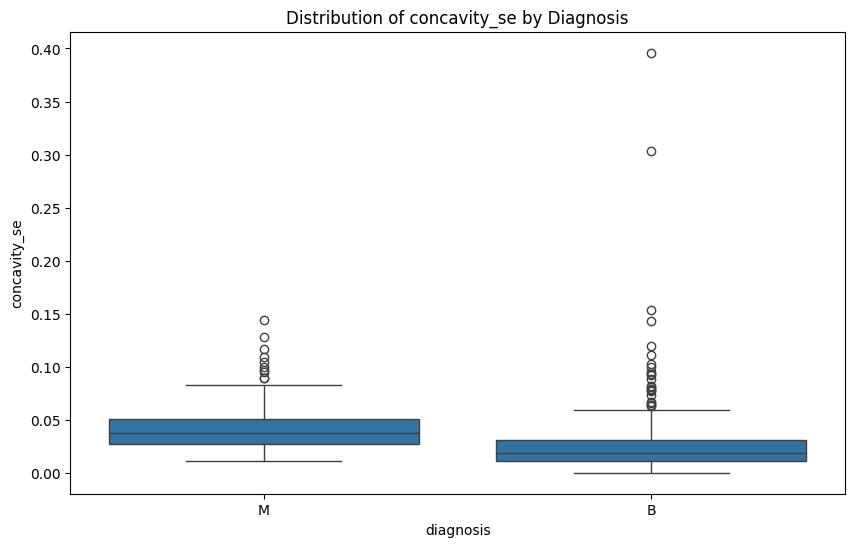

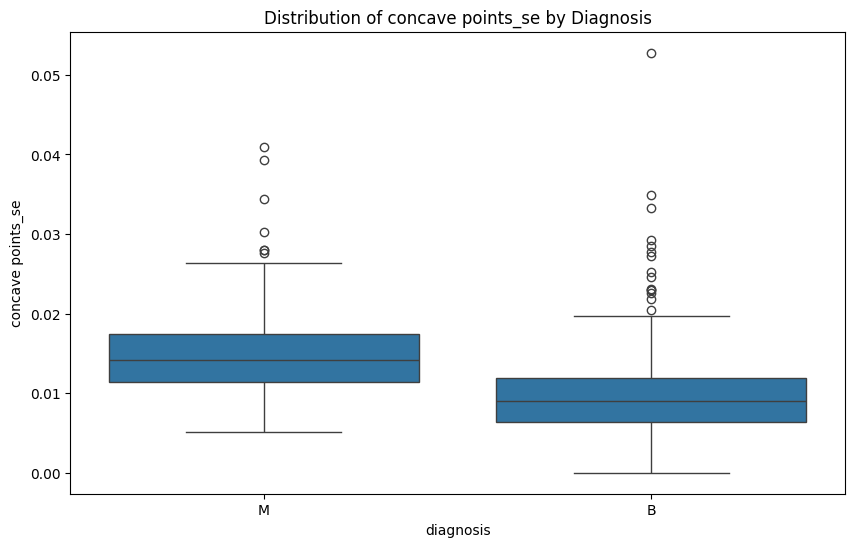

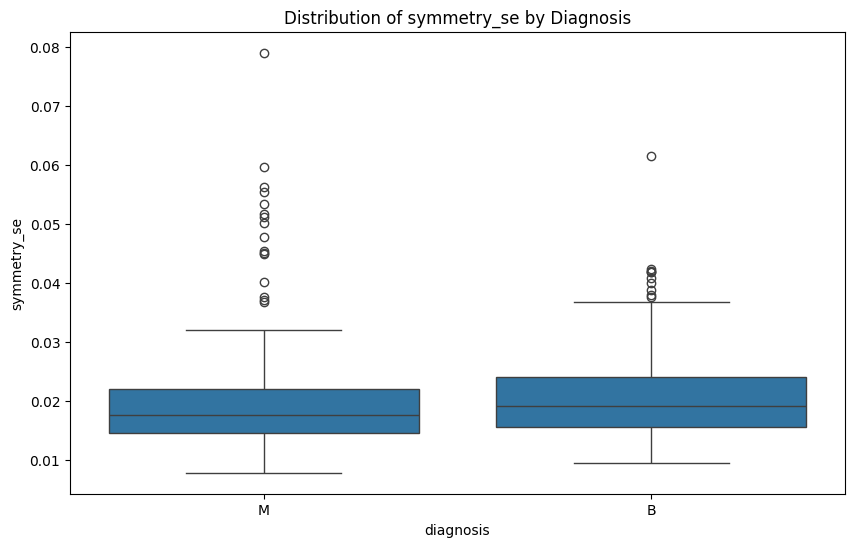

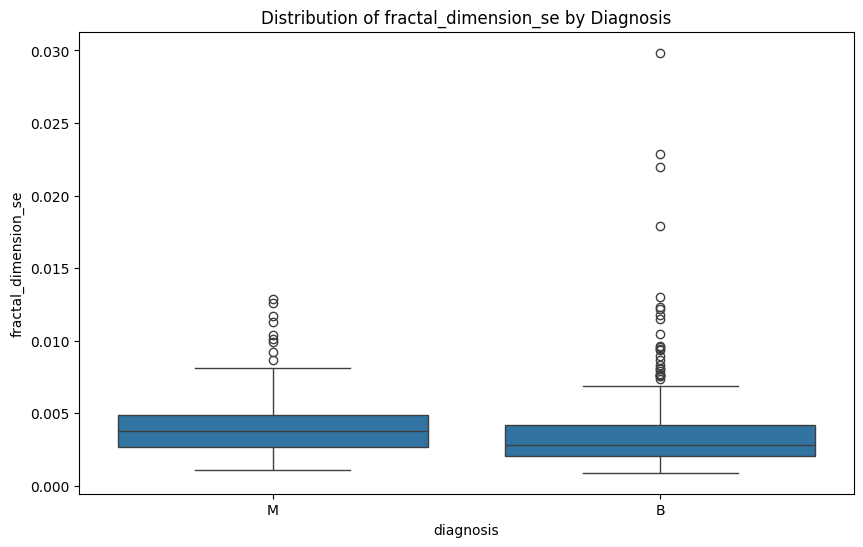

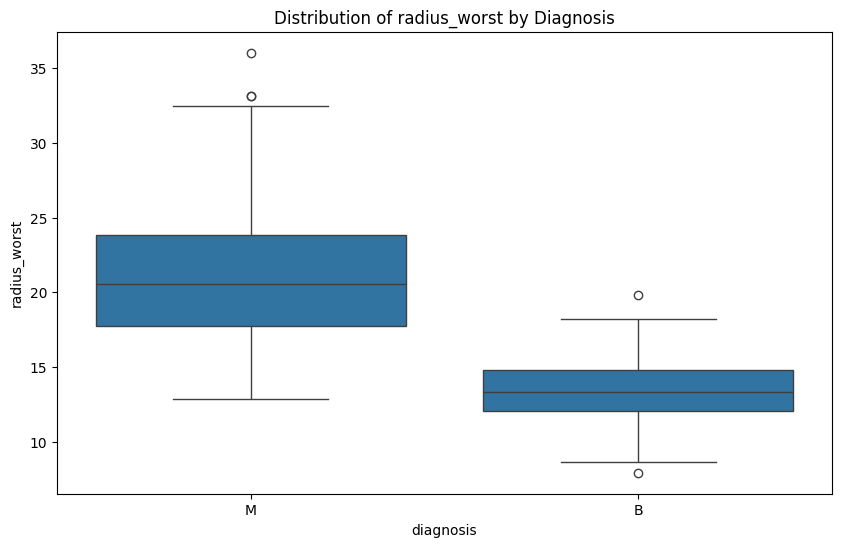

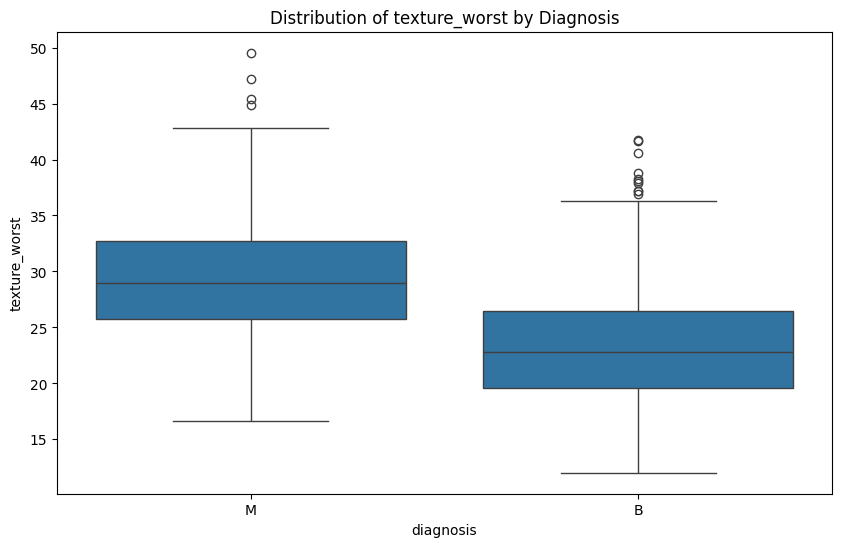

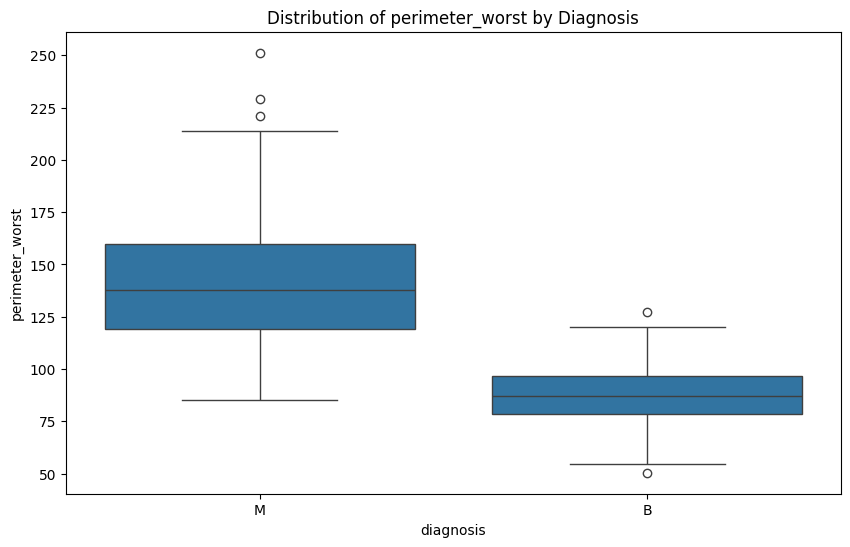

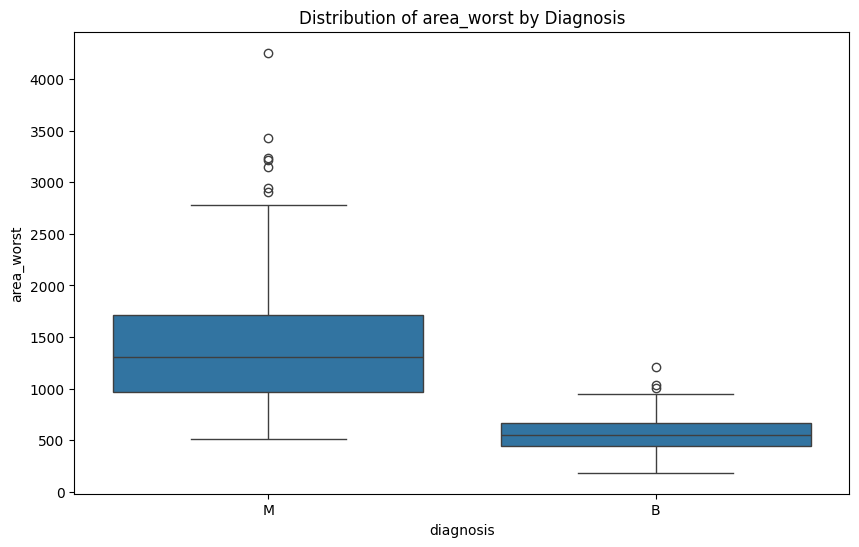

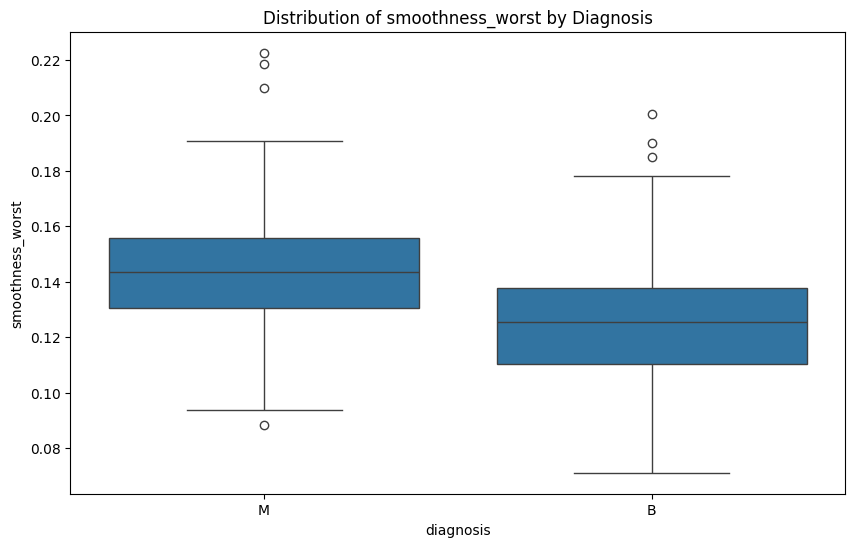

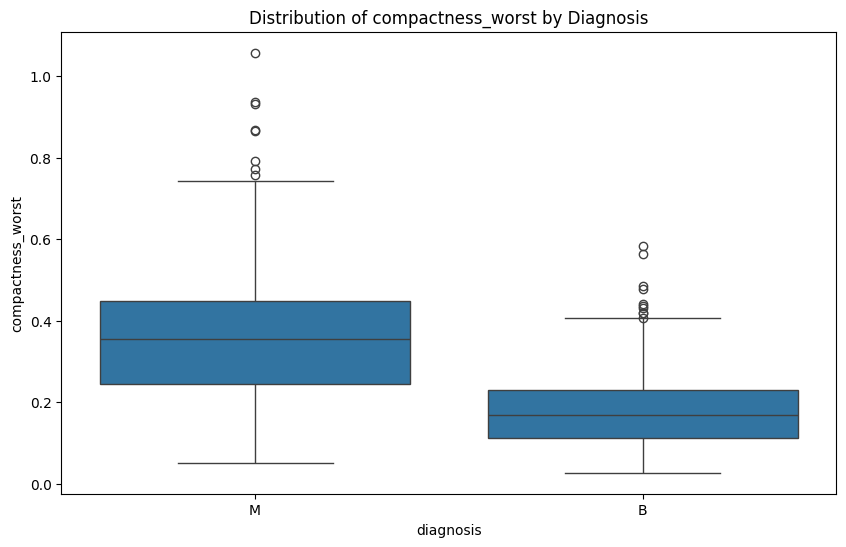

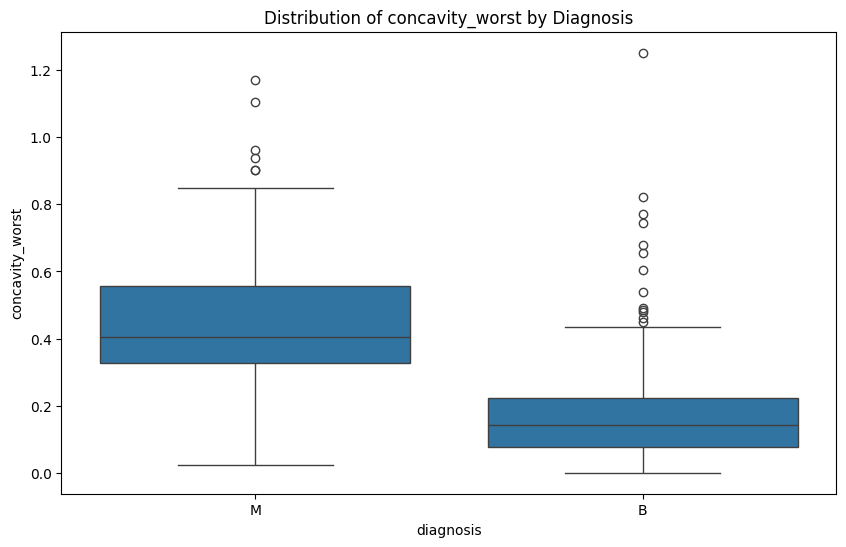

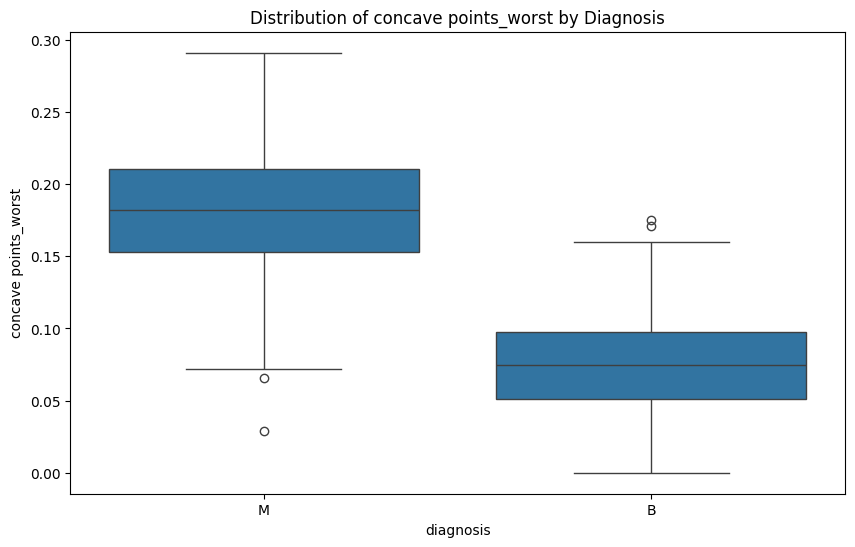

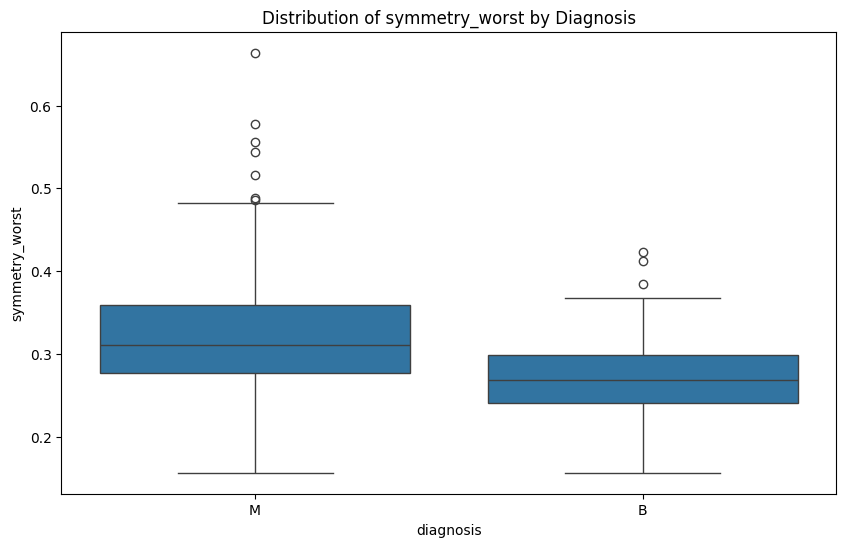

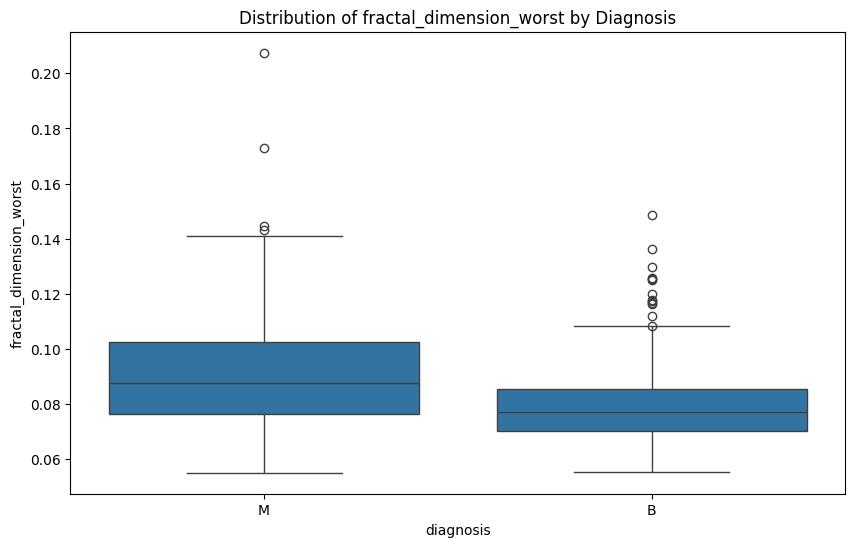

In [63]:
for feature in numerical_columns:
    if feature != 'id' and feature != 'Unnamed: 32':
        plot_distribution_by_target(data, feature)

### **Correlation Matrix**

#### **Ubah Nilai Target ke Numerik**

In [64]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

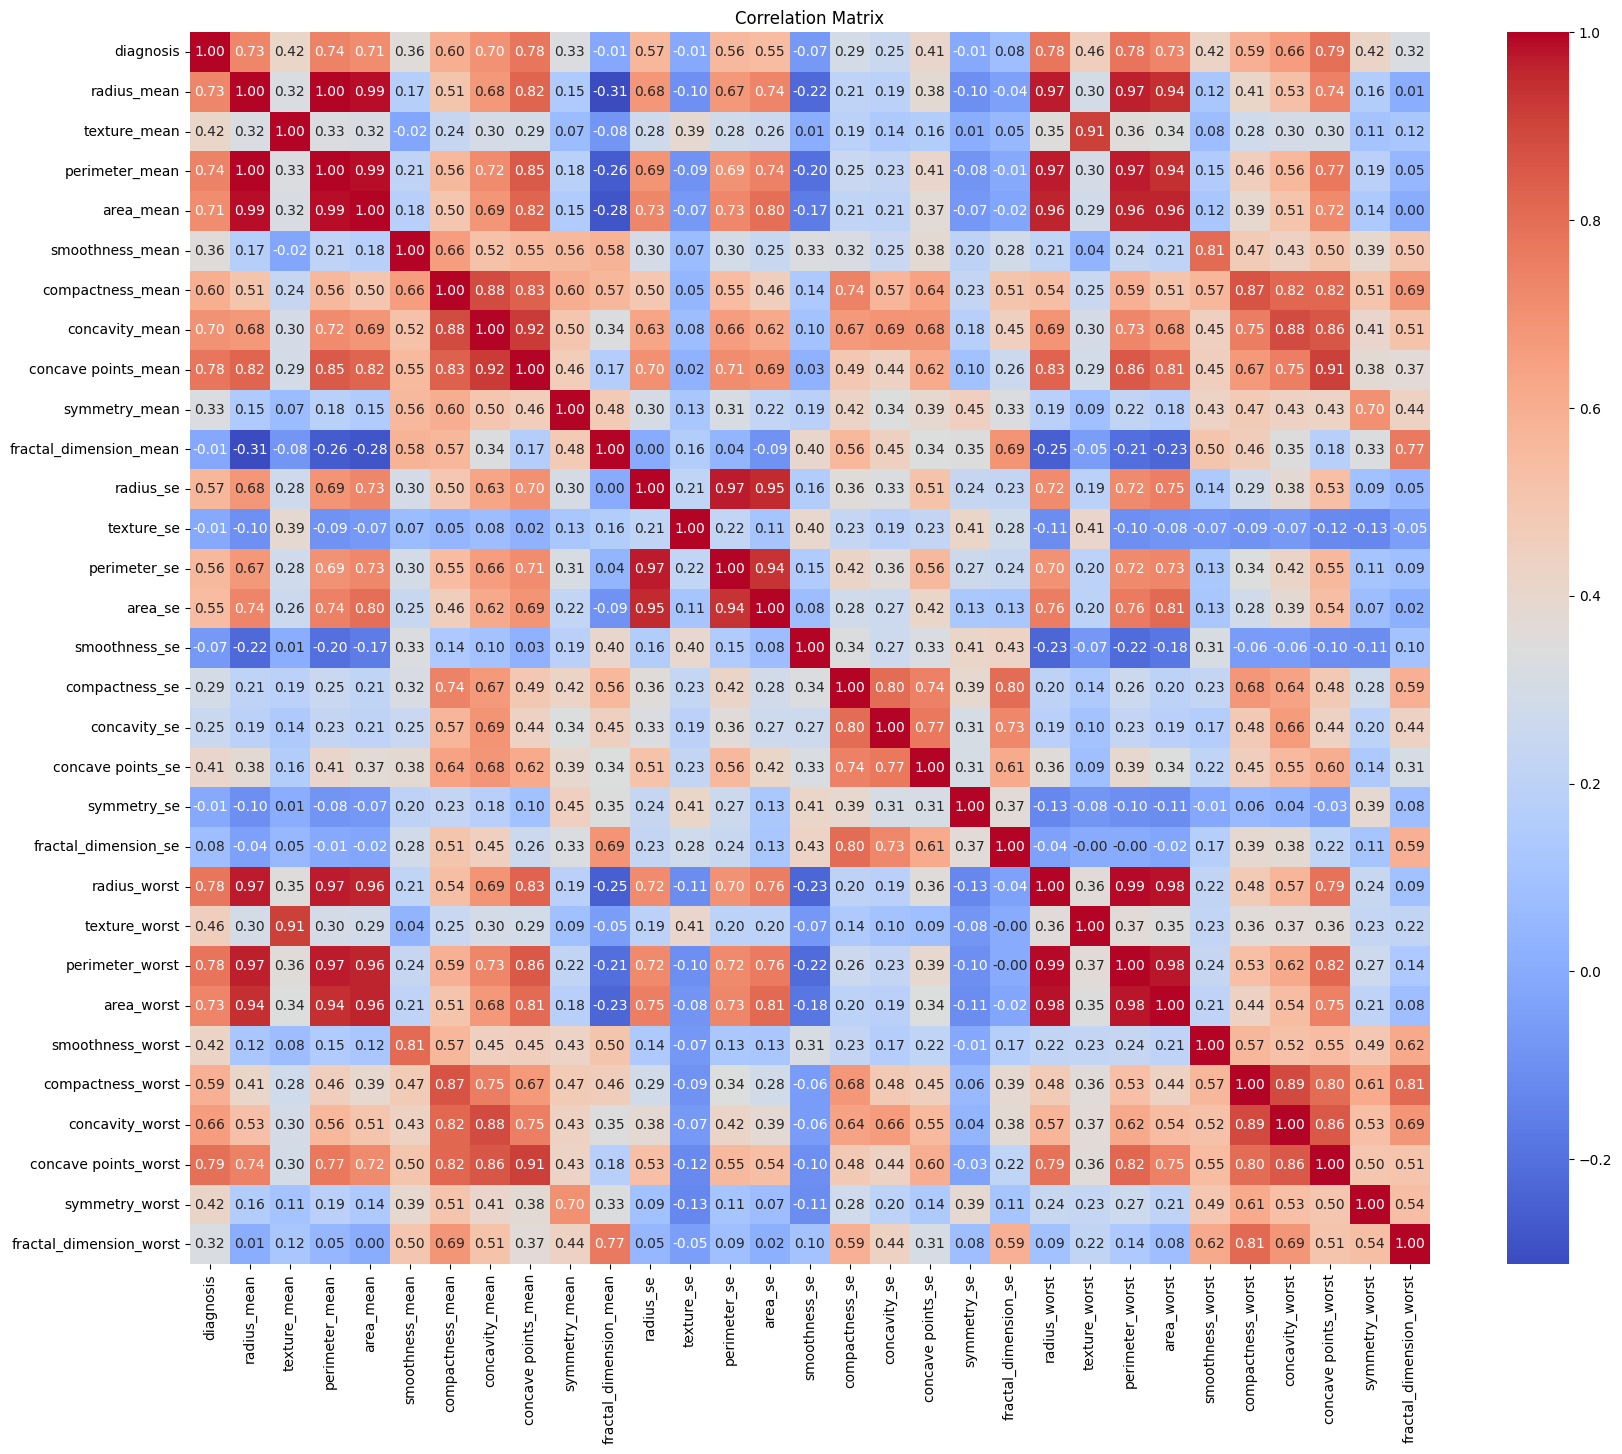

In [65]:
plt.figure(figsize=(20, 16))
correlation_matrix = data.drop(['id', 'Unnamed: 32'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

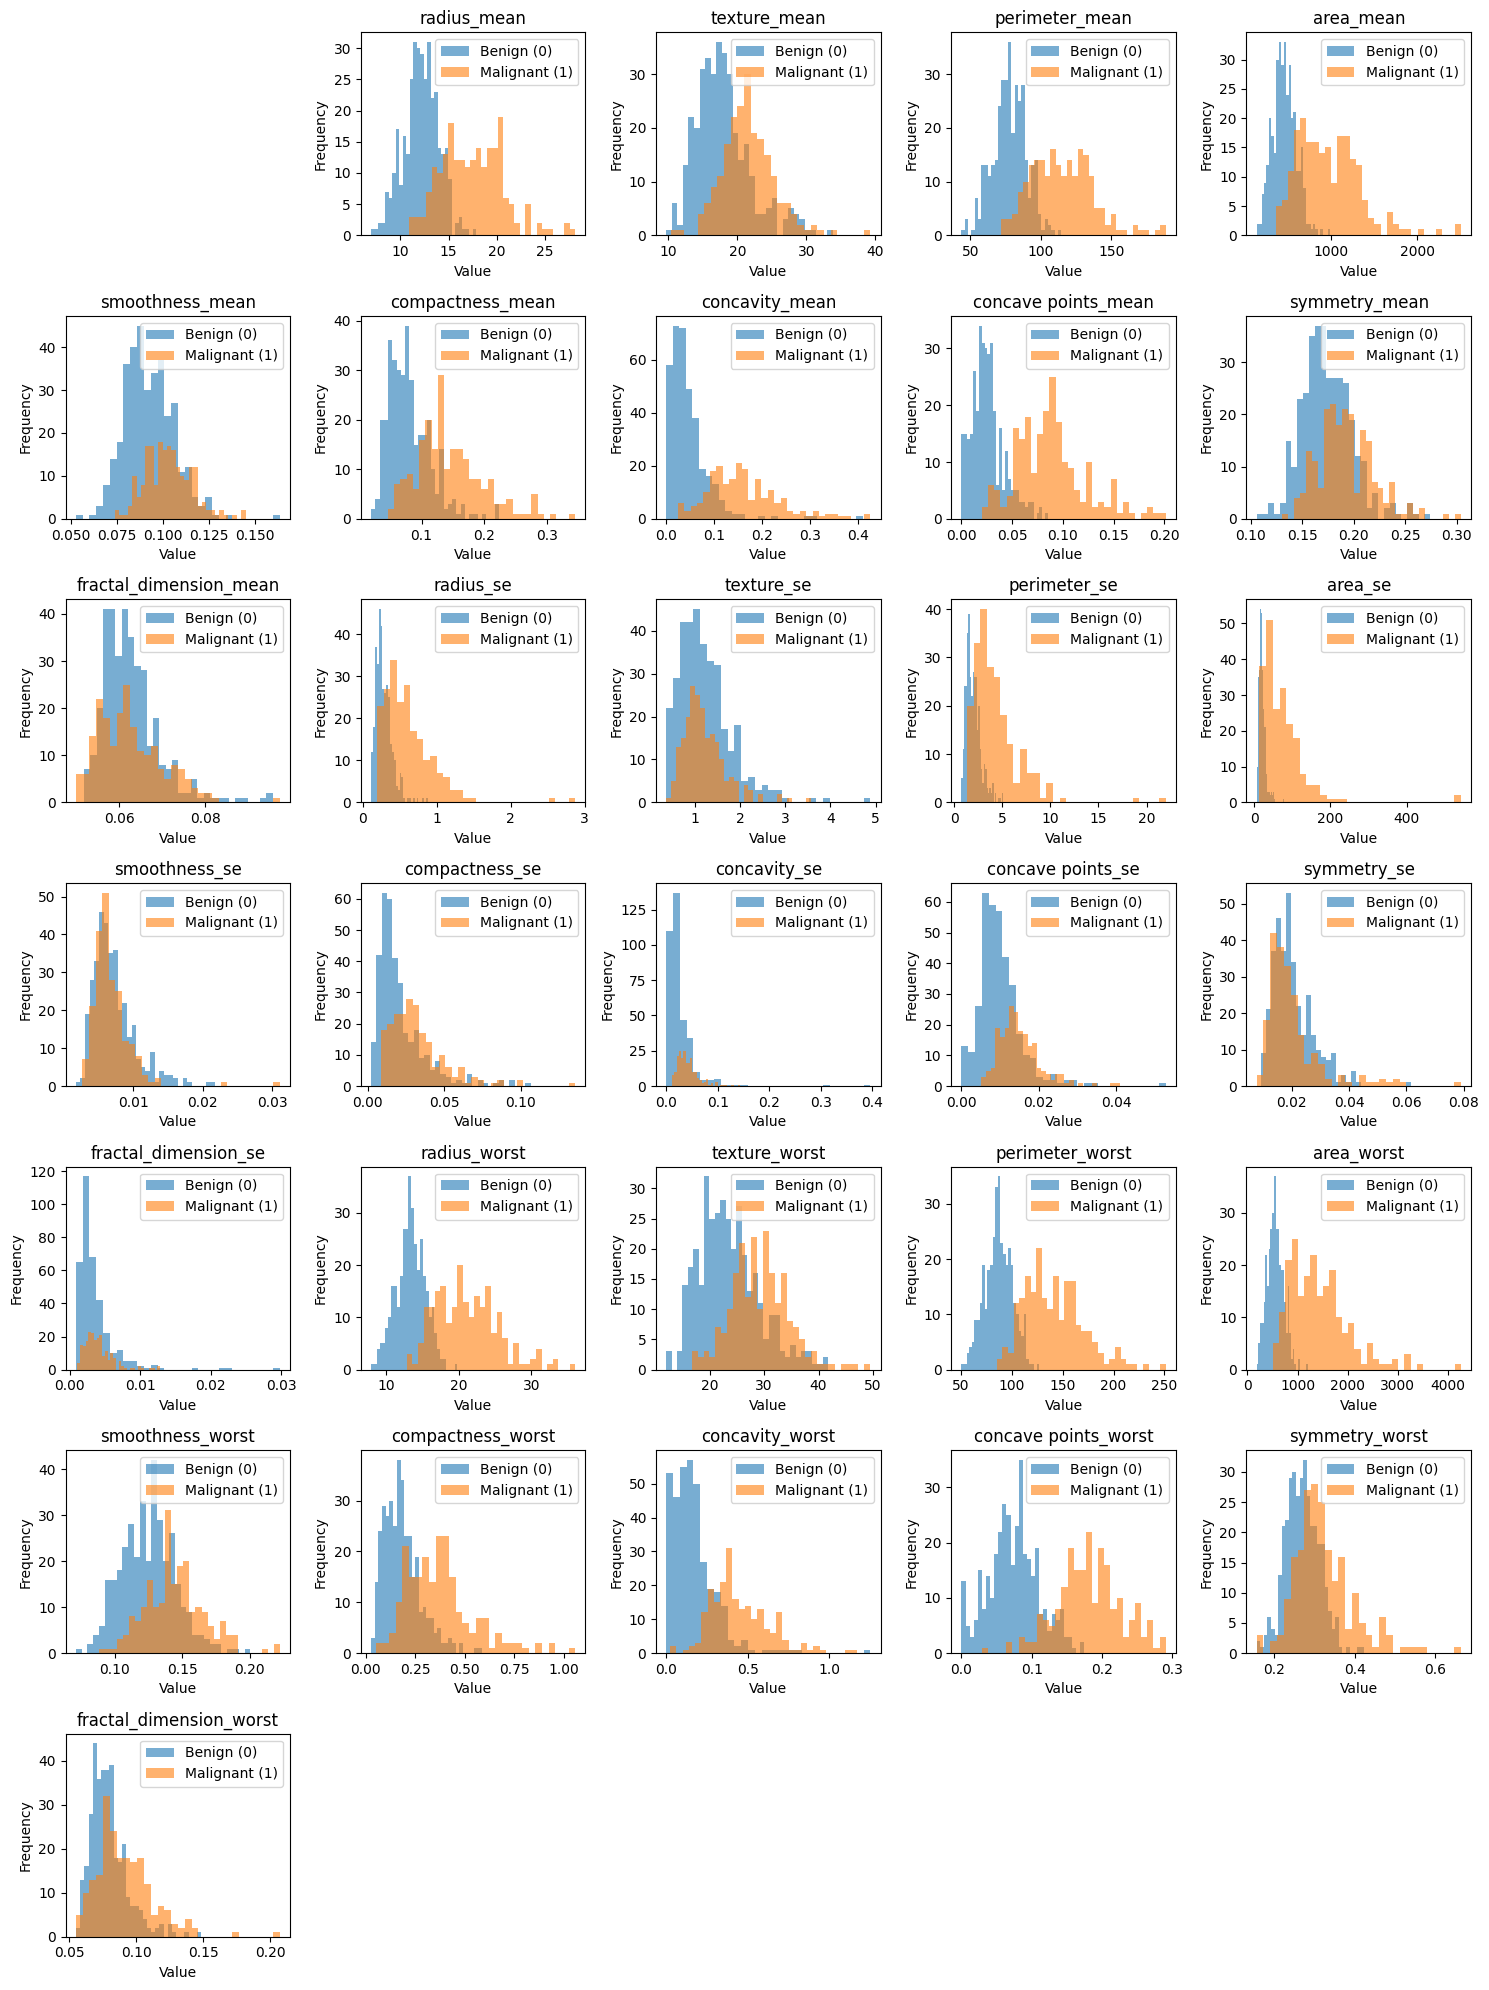

In [66]:
def plot_feature_distribution(data, target_column, bins=30):
    # Pisahkan data berdasarkan kelas target
    data_benign = data[data[target_column] == 0]  # Kelas Benign (0)
    data_malignant = data[data[target_column] == 1]  # Kelas Malignant (1)

    # Tentukan fitur-fitur yang akan diplot (kecuali kolom target)
    feature_columns = [col for col in data.columns if col != target_column]

    # Plot distribusi tiap fitur dengan target
    plt.figure(figsize=(15, 20))
    for i, feature in enumerate(feature_columns, 1):
        if feature == 'id' or feature == 'Unnamed: 32':
            continue
        plt.subplot((len(feature_columns) + 4) // 5, 5, i)
        plt.hist(data_benign[feature], bins=bins, alpha=0.6, label='Benign (0)')
        plt.hist(data_malignant[feature], bins=bins, alpha=0.6, label='Malignant (1)')
        plt.title(feature)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.legend()

    plt.tight_layout()
    plt.show()

# Panggil fungsi dengan dataset dan kolom target ('diagnosis')
plot_feature_distribution(data, 'diagnosis', bins=30)

## **PREPOCESSING**

### **Menghapus kolom yang tidak relevan**

In [67]:
data = data.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### **Handling Missing Values (jika ada)**

In [68]:
if data.isnull().sum().any():
    data = data.fillna(data.median())
    print("Missing values telah ditangani")
else:
    print("Tidak ada missing values")

Tidak ada missing values


### **Handling Outliers**

In [69]:
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])

    return data

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    data = handle_outliers(data, column)
print("Outliers telah ditangani dengan metode capping")

Outliers telah ditangani dengan metode capping


In [70]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    return len(outliers)
    print("\nJumlah Outlier per Kolom:")

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    if column != 'id' :  # Skip kolom id
        outliers_count = detect_outliers(data, column)
        if outliers_count > 0:
            print(f"{column}: {outliers_count} outliers")
        else:
            print(f"{column}: Tidak ada outlier")

diagnosis: Tidak ada outlier
radius_mean: Tidak ada outlier
texture_mean: Tidak ada outlier
perimeter_mean: Tidak ada outlier
area_mean: Tidak ada outlier
smoothness_mean: Tidak ada outlier
compactness_mean: Tidak ada outlier
concavity_mean: Tidak ada outlier
concave points_mean: Tidak ada outlier
symmetry_mean: Tidak ada outlier
fractal_dimension_mean: Tidak ada outlier
radius_se: Tidak ada outlier
texture_se: Tidak ada outlier
perimeter_se: Tidak ada outlier
area_se: Tidak ada outlier
smoothness_se: Tidak ada outlier
compactness_se: Tidak ada outlier
concavity_se: Tidak ada outlier
concave points_se: Tidak ada outlier
symmetry_se: Tidak ada outlier
fractal_dimension_se: Tidak ada outlier
radius_worst: Tidak ada outlier
texture_worst: Tidak ada outlier
perimeter_worst: Tidak ada outlier
area_worst: Tidak ada outlier
smoothness_worst: Tidak ada outlier
compactness_worst: Tidak ada outlier
concavity_worst: Tidak ada outlier
concave points_worst: Tidak ada outlier
symmetry_worst: Tidak a

### **Feature Selection**

In [71]:
correlations_spearman = data.corr('spearman')['diagnosis'].sort_values(ascending=False)
significant_features = correlations_spearman[correlations_spearman.abs() > 0.6].index.tolist()
significant_features.remove("diagnosis")
significant_features

['perimeter_worst',
 'radius_worst',
 'area_worst',
 'concave points_worst',
 'concave points_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'radius_mean',
 'area_se',
 'concavity_worst',
 'perimeter_se',
 'radius_se',
 'compactness_mean',
 'compactness_worst']

### **Split Data**

In [72]:
X = data[significant_features]
print(X.head())
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

   perimeter_worst  radius_worst  area_worst  concave points_worst  \
0           184.60         25.38     1937.05                0.2654   
1           158.80         24.99     1937.05                0.1860   
2           152.50         23.57     1709.00                0.2430   
3            98.87         14.91      567.70                0.2575   
4           152.20         22.54     1575.00                0.1625   

   concave points_mean  perimeter_mean  area_mean  concavity_mean  \
0              0.14710          122.80     1001.0         0.28241   
1              0.07017          132.90     1326.0         0.08690   
2              0.12790          130.00     1203.0         0.19740   
3              0.10520           77.58      386.1         0.24140   
4              0.10430          135.10     1297.0         0.19800   

   radius_mean  area_se  concavity_worst  perimeter_se  radius_se  \
0        17.99    86.20           0.7119        5.9835    0.84865   
1        20.57    74.08   

### **Normalisasi**

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

with open("scaler.pkl", "wb") as scaler_file:

    pickle.dump(scaler, scaler_file)

In [74]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### **SMOTE**

In [75]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [76]:
print("\nDistribusi kelas sebelum SMOTE:")
print("Training set:", y_train.value_counts())
print("Testing set:", y_test.value_counts())


Distribusi kelas sebelum SMOTE:
Training set: diagnosis
0.0    209
1.0    132
Name: count, dtype: int64
Testing set: diagnosis
0.0    148
1.0     80
Name: count, dtype: int64


In [77]:
print("\nDistribusi kelas setelah SMOTE:")
print("Training set:", pd.Series(y_train_balanced).value_counts())
print("Testing set:", y_test.value_counts())


Distribusi kelas setelah SMOTE:
Training set: diagnosis
0.0    209
1.0    209
Name: count, dtype: int64
Testing set: diagnosis
0.0    148
1.0     80
Name: count, dtype: int64


## **MODELLING MENGGUNAKAN MODEL LOGISTIC REGRESSION**

In [78]:
# Inisialisasi dan latih model Logistic Regression dengan data seimbang
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_balanced, y_train_balanced)


# Prediksi pada data pengujian
y_pred_lr = logistic_model.predict(X_test_scaled)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred_lr)
classification_rep = classification_report(y_test, y_pred_lr)
confusion_mat = confusion_matrix(y_test, y_pred_lr)

# menyimpan model
with open("logistic_model.pkl", "wb") as model_file:
    pickle.dump(logistic_model, model_file)

# Menampilkan hasil evaluasi
print(f"Akurasi: {accuracy}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(confusion_mat)

from sklearn.metrics import f1_score, precision_score, recall_score

f1 = f1_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Akurasi: 0.9649122807017544
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       148
         1.0       0.94      0.96      0.95        80

    accuracy                           0.96       228
   macro avg       0.96      0.96      0.96       228
weighted avg       0.97      0.96      0.97       228

Confusion Matrix:
[[143   5]
 [  3  77]]
F1 Score: 0.9506172839506173
Precision: 0.9390243902439024
Recall: 0.9625


## **MODELLING MENGGUNAKAN MODEL SVM**

In [79]:
# Modelling dengan SVM
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train_balanced, y_train_balanced)
# Prediksi
y_pred_svm = svm_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


f1 = f1_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy:

 0.9517543859649122
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       148
         1.0       0.92      0.95      0.93        80

    accuracy                           0.95       228
   macro avg       0.94      0.95      0.95       228
weighted avg       0.95      0.95      0.95       228

Confusion Matrix:
 [[141   7]
 [  4  76]]
F1 Score: 0.9325153374233128
Precision: 0.9156626506024096
Recall: 0.95


## **MODELLING MENGGUNAKAN MODEL ANN**

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Membuat model sequential
model = Sequential()

# Menambahkan layer input
model.add(Dense(units=64, activation="relu", input_dim=X_train_balanced.shape[1]))

# Menambahkan hidden layer
model.add(Dense(units=32, activation="relu"))

# Menambahkan layer output
model.add(Dense(units=1, activation="sigmoid"))

# Compile model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Melatih model
model.fit(X_train_balanced, y_train_balanced, epochs=100, batch_size=32)

# Prediksi
y_pred_ann = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluasi model
accuracy_ann = accuracy_score(y_test, y_pred_ann)
classification_rep_ann = classification_report(y_test, y_pred_ann)
confusion_mat_ann = confusion_matrix(y_test, y_pred_ann)

print(f"Akurasi ANN (TensorFlow): {accuracy_ann}")
print("Classification Report ANN (TensorFlow):")
print(classification_rep_ann)
print("Confusion Matrix ANN (TensorFlow):")
print(confusion_mat_ann)


from sklearn.metrics import f1_score, precision_score, recall_score

f1 = f1_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann)
recall = recall_score(y_test, y_pred_ann)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Epoch 1/100


e:\Phython 3.10\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8782 - loss: 0.5085   
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9533 - loss: 0.3136 
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9435 - loss: 0.2194 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9315 - loss: 0.1895 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9440 - loss: 0.1531 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9473 - loss: 0.1538 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9401 - loss: 0.1538 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9490 - loss: 0.1414 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1201 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9446 - loss: 0.1190 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9524 - loss: 0.1169 
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

## **MODELLING MENGGUNAKAN MODEL KNN**

In [81]:
# Modelling dengan KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Latih model
knn.fit(X_train_balanced, y_train_balanced)

# Prediksi
y_pred_knn = knn.predict(X_test_scaled)

# Evaluasi model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)
confusion_mat_knn = confusion_matrix(y_test, y_pred_knn)

# Menampilkan hasil evaluasi KNN
print("Model KNN")
print(f"Akurasi KNN: {accuracy_knn}")
print("Classification Report KNN:")
print(classification_rep_knn)
print("Confusion Matrix KNN:")
print(confusion_mat_knn)

Model KNN
Akurasi KNN: 0.9385964912280702
Classification Report KNN:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       148
         1.0       0.92      0.90      0.91        80

    accuracy                           0.94       228
   macro avg       0.93      0.93      0.93       228
weighted avg       0.94      0.94      0.94       228

Confusion Matrix KNN:
[[142   6]
 [  8  72]]
